In [72]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import json

## Subset of citations

In [88]:
all_citations = pd.read_csv('../inputdata/all_cases_citations.csv')
len(all_citations)

43780

In [89]:
sampled_cases = pd.read_csv('../inputdata/sampled_cases.csv').rename(columns={'source':'case'})
len(sampled_cases)

177

In [90]:
sampled_cases.head()

,quantile,case,citations,topic
0,1.00,61990CJ0006,43,social policy
1,1.00,62003CJ0453,32,public health
2,0.99,62007CJ0378,32,social policy
3,0.98,61995CJ0261,19,social policy
4,1.00,62000CJ0465,17,data protection


Taking the subset of the whole citations files where the target is in the sample

In [91]:
citations_subset = pd.merge(all_citations, 
                    sampled_cases[['case']].rename(columns={'case':'target'}),
                    how='inner', left_on='target', right_on='target')

In [92]:
len(citations_subset)

609

---
## Citations Graph

In [75]:
citations_subset.head()

,source,target,topic
0,61976CJ0089,61973CJ0039,public health
1,61980CJ0132,61973CJ0039,public health
2,61982CJ0314,61973CJ0039,public health
3,61983CJ0001,61973CJ0039,public health
4,61980CJ0132,61975CJ0004,public health


In [227]:
g = nx.from_pandas_edgelist(citations_subset, 'source', 'target')
nodes = sampled_cases[['case','topic']].set_index('case').to_dict('index')
nx.set_node_attributes(g, nodes)

In [231]:
#anly the sampled nodes has attributes
g.nodes()['61973CJ0039']

{'topic': 'public health'}

Graph description

In [107]:
N_nodes, N_edges = g.order(), g.size()
avg_deg = float(N_nodes)/N_edges

In [108]:
print ('Nodes: {}\nEdges: {}\nAvg Degree: {}'.format(N_nodes, N_edges, avg_deg) )

Nodes: 599
Edges: 609
Avg Degree: 0.9835796387520526


In [154]:
sub1 = {node if att['topic'] =='social policy' else None for node, att in nodes.items()}
sub2 = {node if att['topic'] =='public health' else None for node, att in nodes.items()}
sub3 = {node if att['topic'] =='data protection' else None for node, att in nodes.items()}

In [169]:
subgraphs = [sub1,sub2,sub3]
colors = ["red", "skyblue", "gold"]
def find_color(node):
    for subgraph in subgraphs:
        if node in subgraph:
            return colors[subgraphs.index(subgraph)]
    return "gray"#"ghostwhite"

In [170]:
node_colors = [find_color(node) for node in g.nodes()]

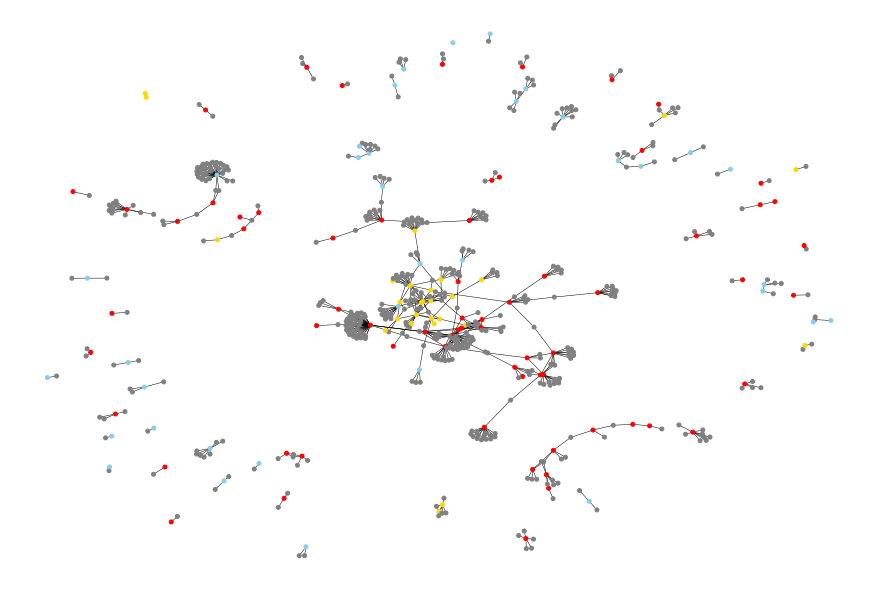

In [171]:
plt.figure(figsize=(12, 8))
nx.draw(g, with_labels=False, node_size=16, width=0.5, node_color=node_colors)
plt.show()

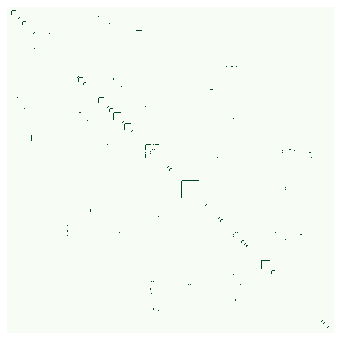

In [247]:
from nxviz.plots import MatrixPlot
# Instantiate a MatrixPlot with no custom styling.
m = MatrixPlot(g)
# Change the cmap prior to drawing.
m.cmap = plt.cm.get_cmap("Greens")
m.draw()
plt.show()

---
## Similarity Graph

In [172]:
casses_similarity = pd.read_csv('../outputdata/results.csv')

In [174]:
casses_similarity.head()

,source_case,similar_case,similarity_score,method,citation_link,source_case_topic
0,62003CJ0453,62006CO0421,0.727373,tfidf,True,public health
1,62003CJ0453,61984CJ0028,0.664869,tfidf,False,public health
2,62003CJ0453,61984CJ0195,0.618935,tfidf,False,public health
3,62003CJ0453,61990CJ0039,0.579735,tfidf,False,public health
4,62003CJ0453,62002CJ0145,0.566752,tfidf,False,public health


In [196]:
#casses_similarity.sort_values(['source_case','method','similarity_score'],ascending=False)#,'similarity_score')

In [180]:
g2 = nx.from_pandas_edgelist(casses_similarity, 'source_case', 'similar_case', edge_attr='similarity_score')
nx.set_node_attributes(g2, nodes)

In [179]:
#are the same
#len(casses_similarity['source_case'].unique())
#len(sampled_cases)

Graph description

In [181]:
N_nodes2, N_edges2 = g2.order(), g2.size()
avg_deg2 = float(N_nodes2)/N_edges2

In [182]:
print ('Nodes: {}\nEdges: {}\nAvg Degree: {}'.format(N_nodes2, N_edges2, avg_deg2) )

Nodes: 9396
Edges: 26162
Avg Degree: 0.35914685421603854


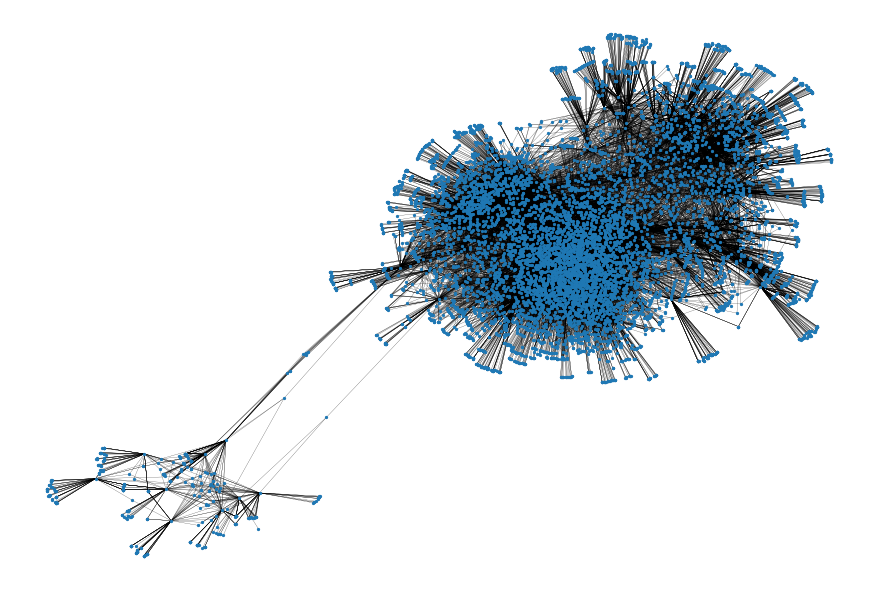

In [184]:
plt.figure(figsize=(12, 8))
nx.draw(g2, with_labels=False, node_size=5, width=0.2)#, node_color=node_colors)
plt.show()